In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import scipy.constants as sconst

# from SimISR.testfunctions import temp_profile, chapman_func

In [51]:
#%% Test functions
def chapman_func(z, H_0, Z_0, N_0):
    """This function will return the Chapman function for a given altitude vector z.  All of the height values are assumed km.
    
    Parameters
    ----------
    z : array_like
        An array of z values in km.
    H_0 : float 
        A single float of the scale height in km.
    Z_0 : float
        The peak density location.
    N_0 : float 
        The peak electron density.
    
    Returns 
    -------
    Ne : array_like
        Electron density as a function of z in m^{-3}
    """
    z1 = (z-Z_0)/H_0
    Ne = N_0*np.exp(0.5*(1-z1-np.exp(-z1)))
    return Ne

def temp_profile(z, T0=1000., z0=100.):
    """This function creates a tempreture profile using arc tan functions for test purposes.
    
    Parameters
    ----------
    z : array_like
        An array of z values in km.
    T0 : array_like
        The value of the lowest tempretures in K.
    z0 : array_like
        The middle value of the atan functions along alitutude. In km.
    
    Returns 
    -------
    Te : array_like 
        The electron density profile in K. 1700*(atan((z-z0)2*exp(1)/400-exp(1))+1)/2 +T0
    Ti : array_like 
        The ion density profile in K. 500*(atan((z-z0)2*exp(1)/400-exp(1))+1)/2 +T0
    """
    zall = (z-z0)*2.*np.exp(1)/400. -np.exp(1)
    atanshp = (np.tanh(zall)+1.)/2
    Te = 1700*atanshp+T0
    Ti = 500*atanshp+T0

    return (Te,Ti)

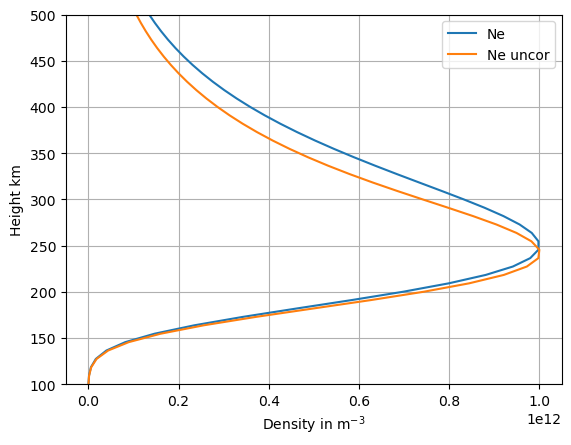

In [52]:
z = np.linspace(100,1000,100)
N_0=1e12
z_0=250.0
H_0=50.0
Ne_profile = chapman_func(z, H_0, z_0, N_0)
(Te_prof, Ti_prof) = temp_profile(z)

Ne_un = Ne_profile/(1+Te_prof/Ti_prof)
Ne_un = N_0*Ne_un/Ne_un.max()
hm = plt.plot(Ne_profile, z,Ne_un,z)
plt.legend(hm,['Ne','Ne uncor'])
plt.xlabel(r'Density in m$^{-3}$')
plt.ylabel("Height km")
plt.ylim([100,500])
plt.grid(True)

32


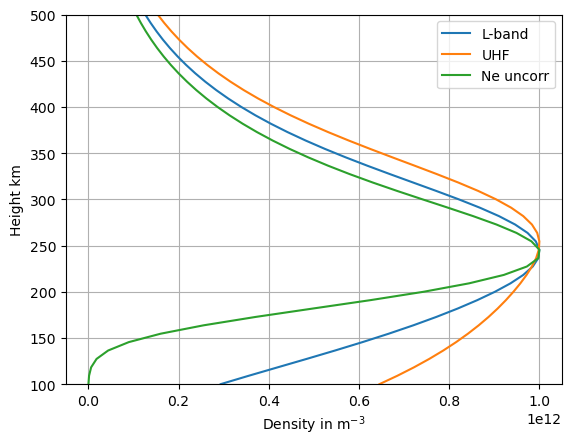

In [55]:
pl_uhf = 480e-6*2*sconst.c *1e-3
pl_lb = 320e-6* 2*sconst.c *1e-3

dh = z[2]-z[1]

h_u = np.ones(int(np.ceil(pl_uhf/dh)))
print(len(h_u))
del_u = (int(np.floor(pl_uhf/dh)))//2 + 6
# Ne_uhf = sig.filtfilt(h_u,[1],Ne_un)[:len(Ne_un)]
Ne_uhf = np.roll(np.convolve(Ne_un,h_u),-del_u)[:len(Ne_un)]

Ne_uhf = N_0*Ne_uhf/Ne_uhf.max()

h_l = np.ones(int(np.floor(pl_lb/dh)))
del_l = (int(np.floor(pl_lb/dh)))//2 +3
Ne_lb = np.roll(np.convolve(Ne_un,h_l),-del_l)[:len(Ne_un)]
Ne_lb = N_0*Ne_lb/Ne_lb.max()

hm = plt.plot(Ne_lb,z,Ne_uhf,z,Ne_un,z)
plt.legend(hm,['L-band','UHF','Ne uncorr'])
plt.xlabel(r'Density in m$^{-3}$')
plt.ylabel("Height km")
plt.ylim([100,500])
plt.grid(True)